In [2]:
# importing the libraries
import pandas as pd
import numpy as np
import os

# for reading and displaying images
from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline

# for creating validation set
from sklearn.model_selection import train_test_split

# for evaluating the model
from sklearn.metrics import accuracy_score
from tqdm import tqdm

# PyTorch libraries and modules
import torch
from torch.autograd import Variable
import torch.nn as nn
from torch.optim import Adam, SGD
from torch.utils.data import Dataset, DataLoader

from sklearn.metrics import *
from sklearn.linear_model import LassoCV
#Transformers
from module import *

In [3]:
# Load training data set (small amount to test if it works first)

xtrain = r"data/training_sample_NoSparse.csv.gz"
ytrain = r"data/training_label_NoSparse.csv.gz"
xtest = r"data/testing_sample_NoSparse.csv.gz"
ytest = r"data/testing_label_NoSparse.csv.gz"


In [4]:
#check balance

samplesdf = pd.DataFrame()
for df in  pd.read_csv(xtrain,compression ="gzip",delimiter=',', chunksize = 10000, header=0):
    samplesdf = samplesdf.append(df)
x_train = samplesdf.to_numpy()

samplesdf = pd.DataFrame()
for df in  pd.read_csv(ytrain,compression ="gzip",delimiter=',', chunksize = 10000, header=0):
    samplesdf = samplesdf.append(df)
y_train = samplesdf.to_numpy()

samplesdf = pd.DataFrame()
for df in  pd.read_csv(xtest,compression ="gzip",delimiter=',', chunksize = 10000, header=0):
    samplesdf = samplesdf.append(df)
x_test = samplesdf.to_numpy()

samplesdf = pd.DataFrame()
for df in  pd.read_csv(ytest,compression ="gzip",delimiter=',', chunksize = 10000, header=0):
    samplesdf = samplesdf.append(df)
y_test = samplesdf.to_numpy()

num0 = 0
num1 = 0
for x in y_train:
    if x == 0:
        num0 = num0 + 1
    else:
        num1 = num1 + 1
num0,num1 #checking if it is balanced

(15161, 14094)

In [7]:
y_train = y_train.reshape(-1)
print(x_test.shape)
print(y_test.shape)
print(x_train.shape)
print(y_train.shape)

(3241, 3273)
(3241, 1)
(29255, 3273)
(29255,)


In [8]:
# Hyper Parameters
EPOCH = 20             # train the training data n times, to save time, we just train 1 epoch
LR = 0.0001              # learning rate
batch_size = 32
wd = LR / EPOCH

In [9]:
reg = LassoCV(cv=5, random_state = 0).fit(x_train,y_train)
print("done")


C:\Users\good6\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18.833109488399714, tolerance: 0.7304020987865336
  model = cd_fast.enet_coordinate_descent(


array([-0.09131746,  0.58193632,  0.44166014, ...,  0.57109845,
        0.1399963 ,  0.00743556])

In [10]:
testresult = reg.predict(x_test)
trainresult = reg.predict(x_train)
for x in testresult:
    print(x)

-0.09131745616569903
0.5819363191194016
0.4416601372961613
0.09879803794587694
0.5610356174680888
0.584746195843451
0.16309788437516365
1.1006224196965488
0.5937836610189768
0.5742487451020089
0.25373538507101384
0.8500666952643059
0.880613730900645
0.8107186486107576
0.571905255419431
0.5595668495552935
0.12480015538095457
0.5762686332671112
0.7483623810215896
-0.2495648317364363
0.5835644384837835
0.6756119028123786
0.9692150962206574
0.5177912997805554
0.3933528171255897
0.6222782611627835
0.08168972481556269
0.2601917796262824
1.085891097875419
0.3978763978795297
0.39617544659978027
0.16388492975806518
0.23521950604156233
0.9398168698595852
0.3041654612324623
0.48900129563864697
0.7010886457531358
0.5737100865459748
1.0090208849123936
0.24628126695501934
-0.011027682627417379
0.4584381890241597
0.015694468760644675
-0.009044539574555976
0.08799344009427901
0.3645826549849646
-0.1375642818244672
1.0350210029186684
0.651129731399694
0.6551580739331613
0.08721255227509955
1.1042581069

0.34355411681325393
-0.11889700758656035
0.6384777697520665
0.468376997558367
0.7466490292071841
0.4057014676882799
0.8508545765103466
0.3337245674050076
0.782215607106695
1.0598868714669716
0.6809348382068601
0.6963957213268133
0.026779780001829512
0.25061682941630065
0.3725180176057264
0.43310855120152186
0.9410676180264175
0.07333664613642521
0.7670824751486742
0.4857689040422833
0.726326534148904
0.8918868376993907
0.609430711302376
0.9676580596059208
0.4673922869583835
0.6587031068626474
-0.11244226486551218
0.42557993502943076
0.5545042063208554
0.03890098197661823
0.3229997937125996
0.9007139998911309
1.0918697129300257
1.073223025482923
0.7939974018863578
0.7527174284381721
0.8345548776523417
0.635499414081558
0.26439693201092324
0.5180136302409541
-0.12377953482345977
0.42696958112380384
0.4663484257453679
0.2754512315105853
0.9341210544754759
0.3081093351407143
0.4311613451749013
0.24899031538173938
0.16936191386234445
0.6860861940627427
0.6160668999892887
0.8469255007888534


In [12]:
i = 0
correct = 0
for x in trainresult:
    if x >=0.5 and y_train[i] == 1:
        correct = correct + 1
    elif x < 0.5 and y_train[i] == 0:
        correct = correct + 1
    i = i + 1
trainacc = correct/i
i = 0
correct = 0
for x in testresult:
    if x >=0.5 and y_test[i] == 1:
        correct = correct + 1
    elif x < 0.5 and y_test[i] == 0:
        correct = correct + 1
    i = i + 1
testacc = correct/i
trainacc,testacc

(0.867202187660229, 0.8389385991977785)

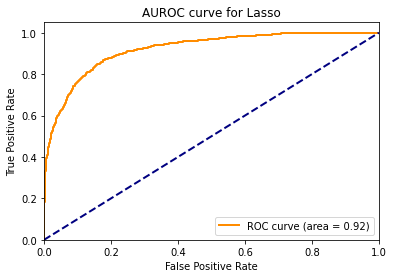

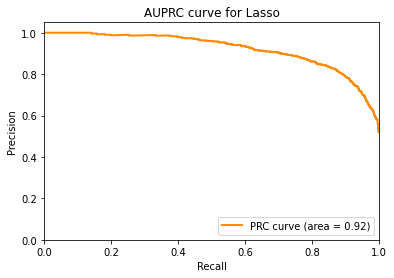

AUPRC = 0.92
f1_score = 0.83


In [16]:
fpr, tpr, _ = roc_curve(y_test,testresult)
roc_auc = auc(fpr,tpr)
plt.figure()
lw = 2
plt.plot(fpr,tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUROC curve for Lasso')
plt.legend(loc="lower right")
plt.show()
precision, recall, _ = precision_recall_curve(y_test,testresult)
prc_auc = auc(recall,precision)
plt.plot(recall,precision, color='darkorange',
         lw=lw, label='PRC curve (area = %0.2f)' % prc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('AUPRC curve for Lasso')
plt.legend(loc="lower right")
plt.show()
print("AUPRC = %.02f"% prc_auc)
ss = np.zeros((len(testresult)))
i = 0
for x in testresult:
    if x >= 0.5:
        ss[i] = 1
    else:
        ss[i] = 0
    i = i + 1
f1s = f1_score(y_test,ss)
print("f1_score = %.02f"% f1s)
df = pd.DataFrame(y_test)
df.to_csv(r"data/lassolb.csv.gz",index=False,sep=",",compression="gzip")
df = pd.DataFrame(testresult)
df.to_csv(r"data/lassopredict.csv.gz",index=False,sep=",",compression="gzip")
